# Credit Card Fraud Detection Case Study
Credit card fraud is any dishonest act or behaviour to obtain information without the proper authorisation of the account holder for financial gain.Our objective is the detect the fraud transactions.


## Overall setps: - 
### - Importing libraries.
### - Reading Dataset.
### - Transforming Dataset.
### - EDA on Dataset.
### - Creating Dummy Variables.
### - Model building
### - Model Evaluation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:

test_df = pd.read_csv("/content/drive/MyDrive/Creadit_card_fraud_detection_project/fraudTest.csv")
train_df = pd.read_csv("/content/drive/MyDrive/Creadit_card_fraud_detection_project/fraudTrain.csv")

In [ ]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
train_df.shape, test_df.shape

((1296675, 23), (555719, 23))

In [ ]:
test_df.shape[0]/train_df.shape[0]*100

42.85723099465942

Testing data is almost 43 percent of train dataset.

Lets concat train and test dataset for analysis purpose.

In [ ]:
total_df = pd.concat([train_df,test_df],axis=0)

In [ ]:
total_df.shape

(1852394, 23)

In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

Lets delete unnamed, last,first columns.

In [ ]:
total_df= total_df.drop(["Unnamed: 0","cc_num","first","last","trans_num","unix_time","zip","merchant"],axis=1)


We have one datetime column which contain a timestamp data. So first lets convert/get historical data from this feature.

In [ ]:
total_df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


In [ ]:
total_df["trans_date"] = pd.to_datetime(total_df.trans_date_trans_time).dt.date
total_df.drop("trans_date_trans_time",axis=1,inplace=True)


In [ ]:
total_df["Month"] = pd.to_datetime(total_df.trans_date).dt.strftime("%b")

In [ ]:
total_df["age"] = pd.to_datetime(total_df.trans_date).dt.year.astype("int") - pd.to_datetime(total_df.dob).dt.year.astype("int")

In [ ]:
filt = total_df["is_fraud"]==1

## EDA

Lets filter only those rows having deteced with fraud trans.

In [ ]:
fraud_df = total_df[filt]

### Analyzing categorical columns.

In [ ]:
fraud_df.select_dtypes(include="O").describe()

,category,gender,street,city,state,job,dob,trans_date,Month
count,9651,9651,9651,9651,9651,9651,9651,9651,9651
unique,14,2,976,887,51,494,962,677,12
top,grocery_pos,F,5205 Annette Islands Apt. 043,Dallas,NY,Quantity surveyor,1977-03-23,2019-02-25,Mar
freq,2228,4899,19,39,730,69,31,50,938


Some infrences: - 
- Most frauds occured in grocery_pos category.
- Females are most frauded gender.
- Newyork state being a developed and smart city counts up for the most fraud cases.
- Qualoty surveyor the person who maintains and cast cost for construction companies has top count in fruad cases based on job.

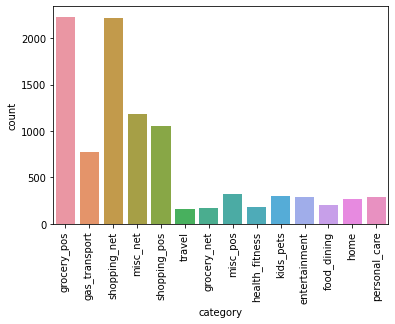

In [ ]:
sns.countplot(fraud_df.category)
plt.xticks(rotation=90)
plt.show()

grocery_pos and shopping_net are most fraudulant categories.

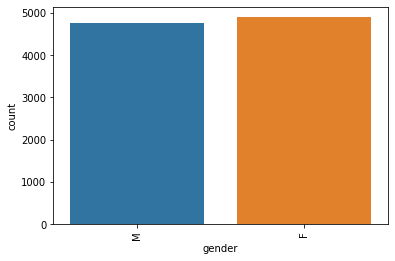

In [ ]:
sns.countplot(fraud_df.gender)
plt.xticks(rotation=90)
plt.show()

Females have credited most fraud transactions altough there is not much difference between the magniture of male and female fraud counts.

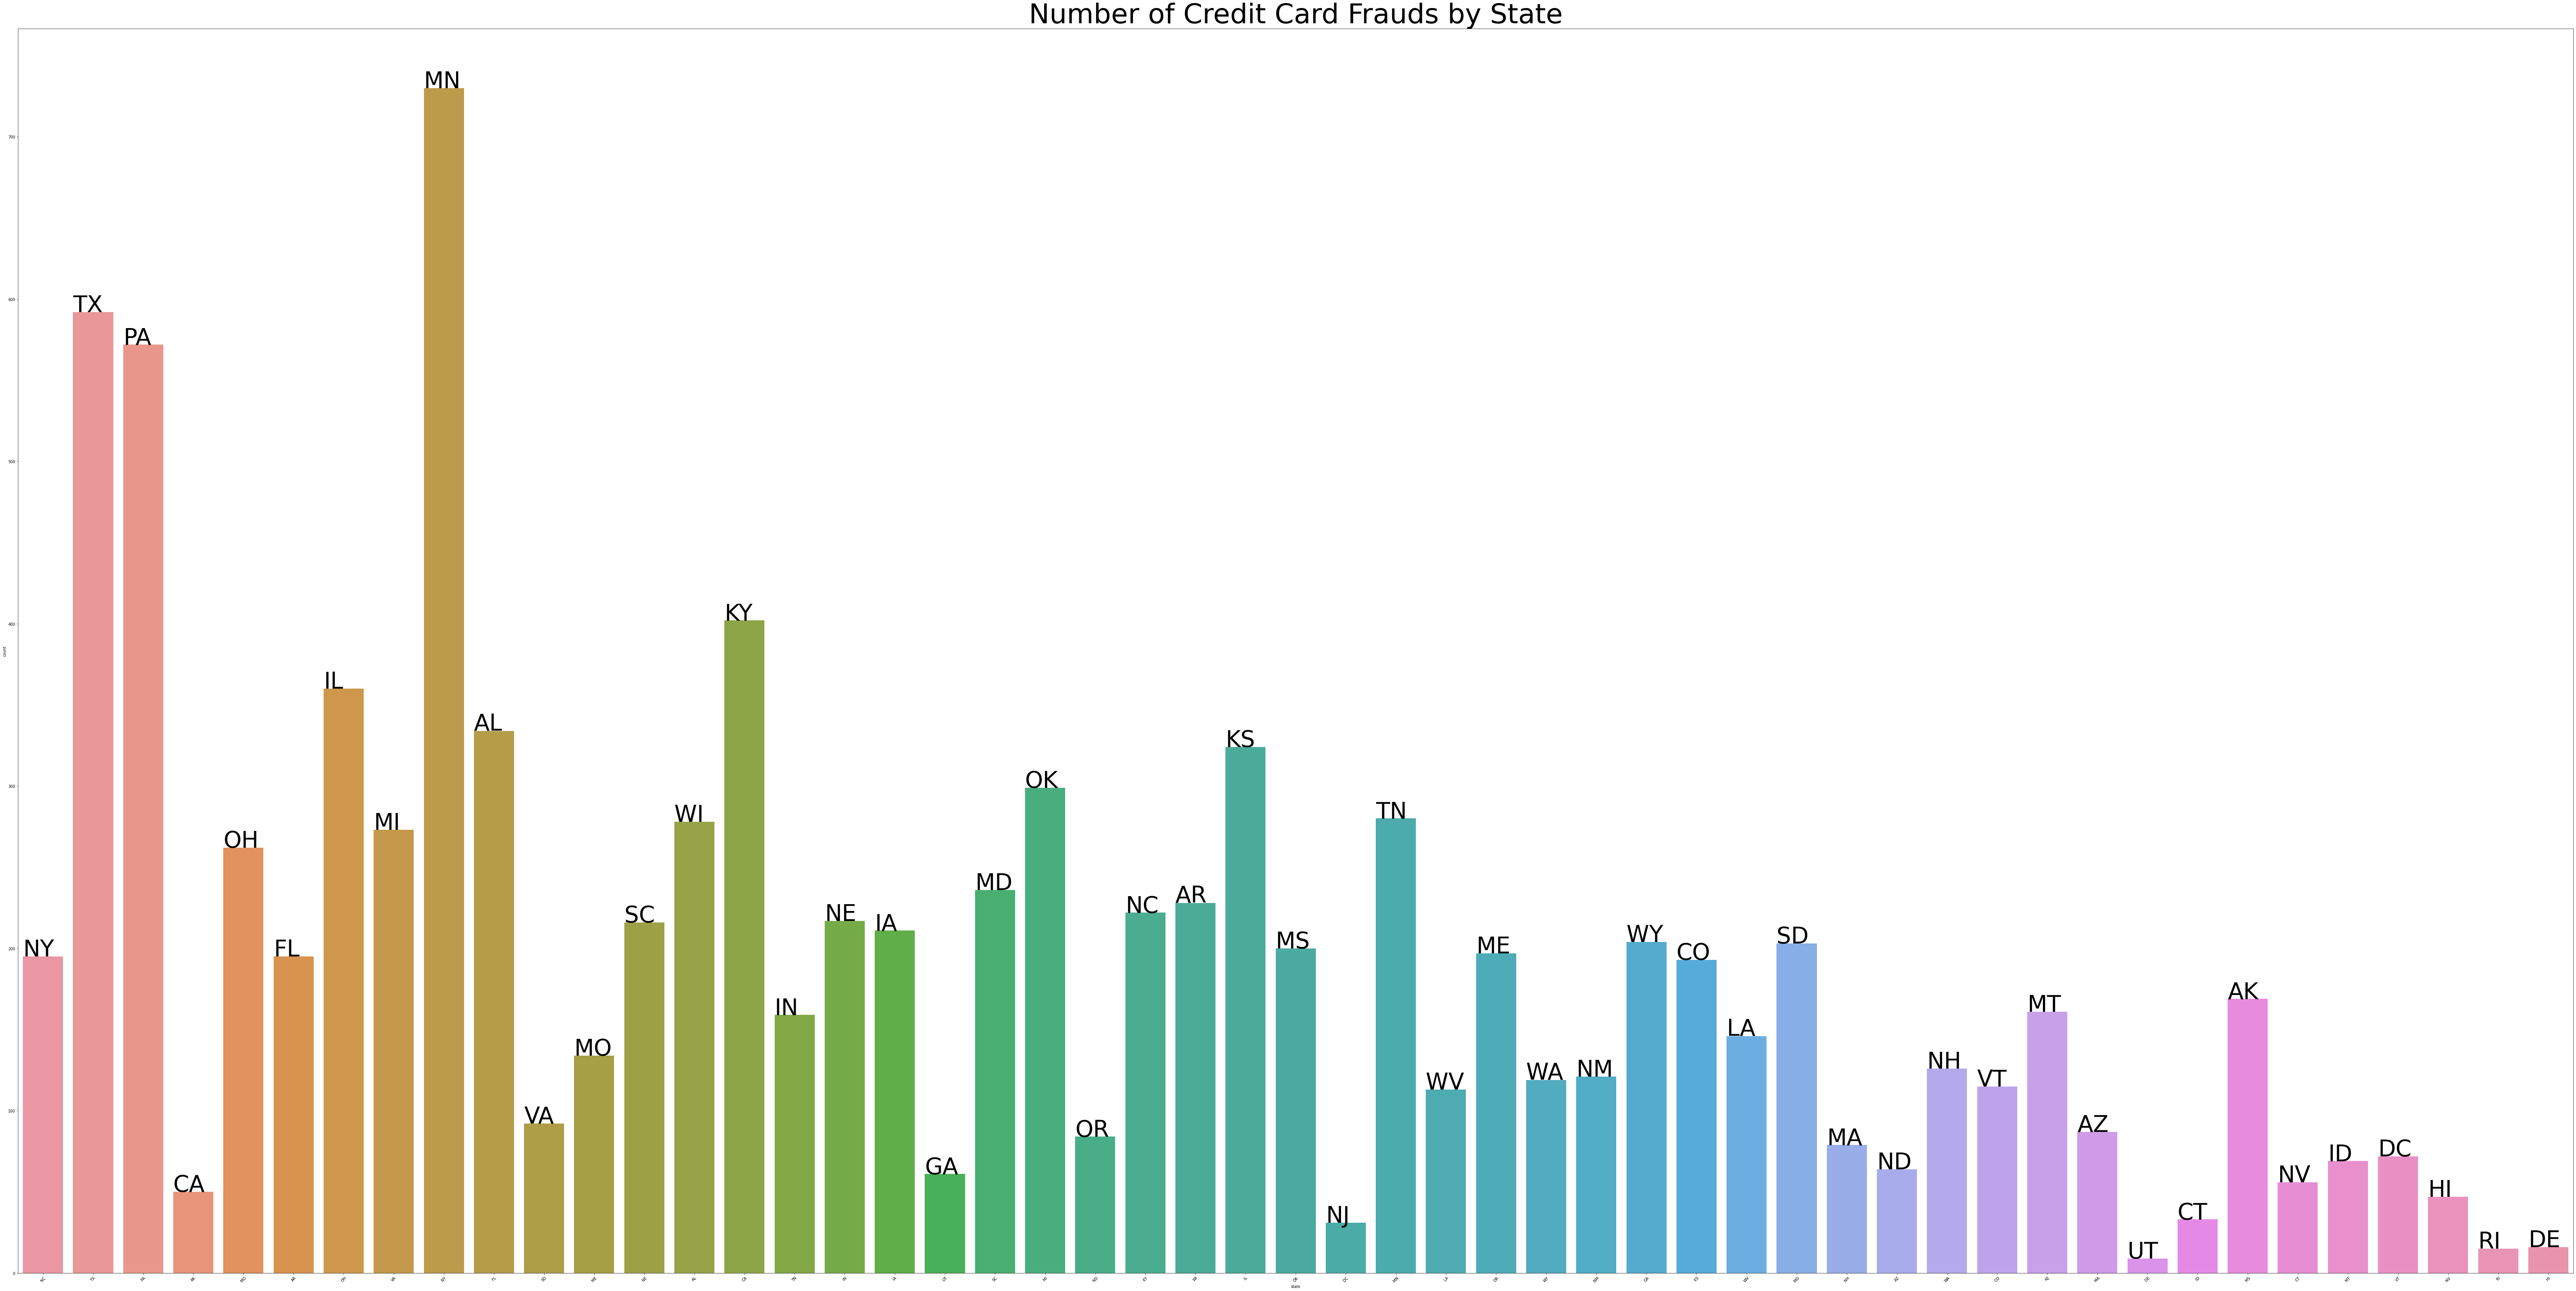

In [ ]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(fraud_df.state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, fraud_df["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

MN State has highest number of fraud cases.

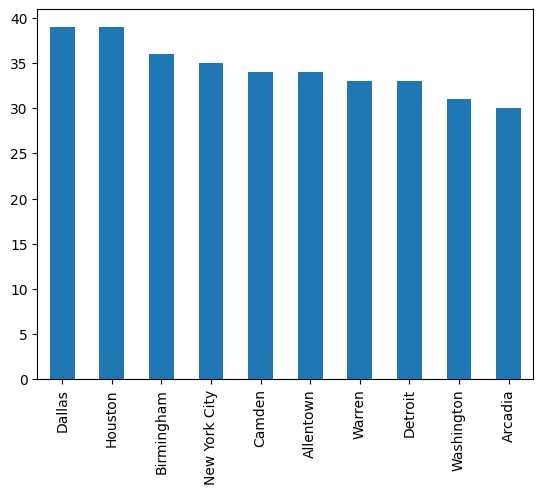

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
fraud_df["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar")
plt.show()

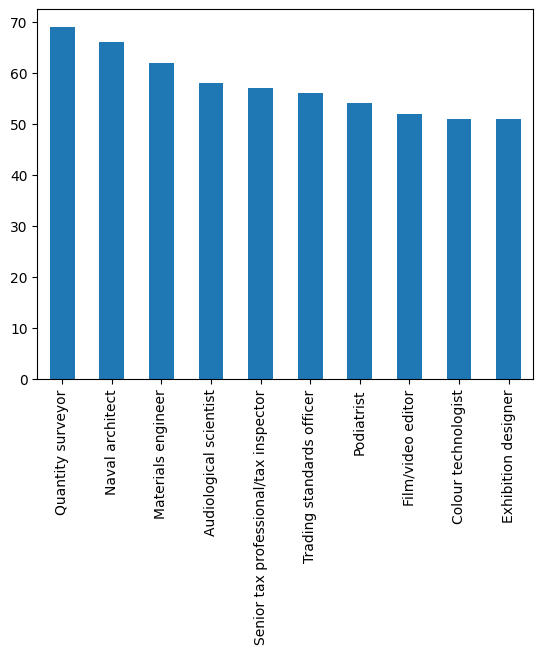

In [ ]:
fraud_df["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar")
plt.show()

Top 3 counts in fraudulant job column are related to construction.

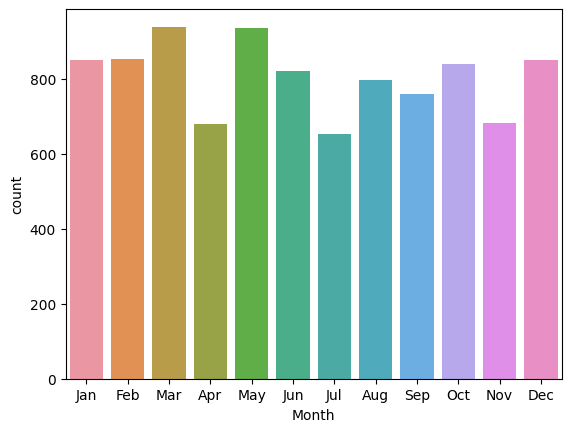

In [ ]:
sns.countplot(fraud_df.Month)
plt.show()

visualizing numerical variable.

In [ ]:
fraud_df.describe(exclude="O")

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,age
count,9651.000000,9651.000000,9651.000000,9.651000e+03,9651.000000,9651.000000,9651.0,9651.000000
mean,530.661412,38.742813,-90.033730,8.999842e+04,38.734962,-90.037919,1.0,48.837841
std,391.028873,5.153060,14.250246,3.062833e+05,5.192904,14.268910,0.0,18.587263
min,1.060000,20.027100,-165.672300,2.300000e+01,19.161782,-166.550779,1.0,14.000000
25%,240.075000,35.042850,-96.727000,7.950000e+02,35.087441,-96.678370,1.0,33.000000
50%,390.000000,39.537000,-87.043600,2.693000e+03,39.516424,-87.167538,1.0,48.000000
75%,902.365000,42.076500,-79.940300,1.905400e+04,42.043486,-79.907350,1.0,61.000000
max,1376.040000,66.693300,-67.950300,2.906700e+06,67.510267,-66.960745,1.0,96.000000


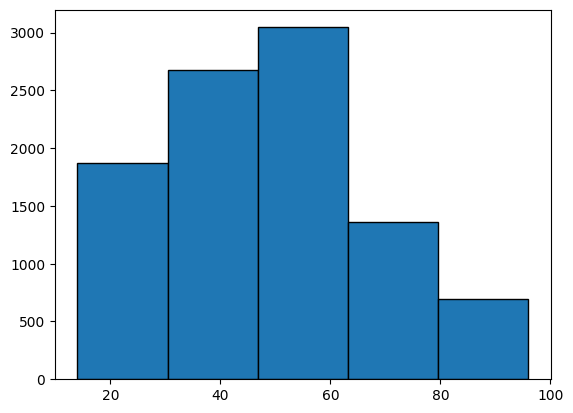

In [ ]:
fig, ax = plt.subplots()
ax.hist(fraud_df.age, edgecolor = "black", bins = 5)

plt.show()

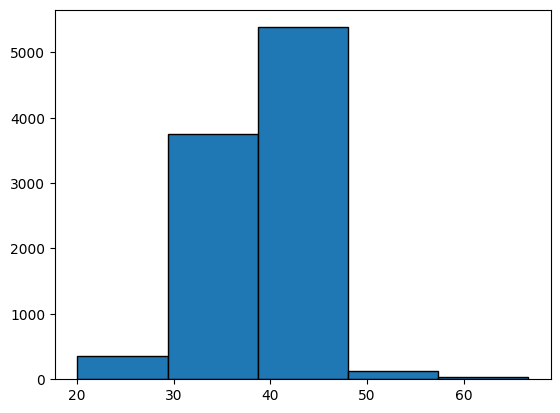

In [ ]:
fig, ax = plt.subplots()
ax.hist(fraud_df.lat, edgecolor = "black", bins = 5)

plt.show()

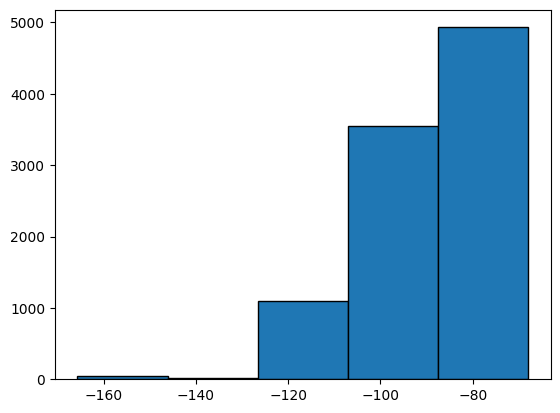

In [ ]:
fig, ax = plt.subplots()
ax.hist(fraud_df.long, edgecolor = "black", bins = 5)

plt.show()

In [ ]:
from scipy.stats import norm, skew

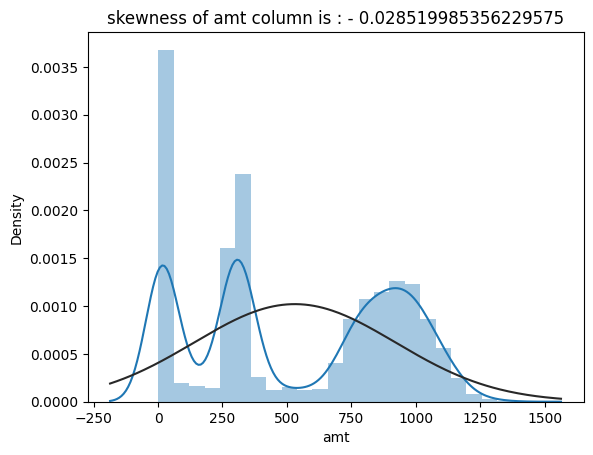

In [ ]:
sns.distplot(fraud_df.amt,fit = norm)
plt.title("skewness of {} column is : - {}".format("amt",str(skew(fraud_df.amt))))
plt.show()

Distribution is not perfact normal. some peaks are formed in groups. data is normally disctibuted in patch of around 600 to 1250 amount range.

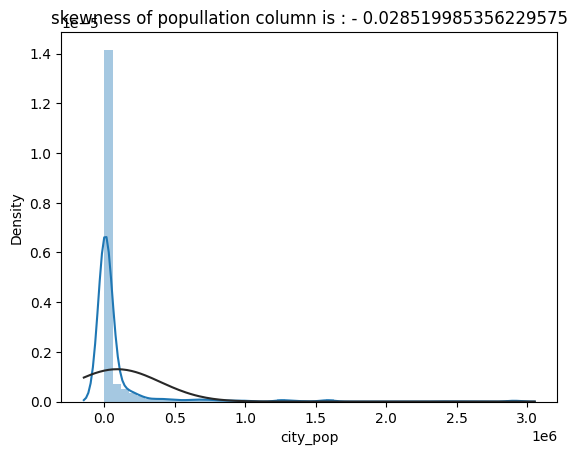

In [ ]:
sns.distplot(fraud_df.city_pop,fit = norm)
plt.title("skewness of {} column is : - {}".format("popullation",str(skew(fraud_df.amt))))
plt.show()

Finally after understaing the pattern of each column lets drop few columns which are not neccesary for our analysis.

In [ ]:
fraud_df.columns

Index(['category', 'amt', 'gender', 'street', 'city', 'state', 'lat', 'long',
       'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_date', 'Month', 'age'],
      dtype='object')

In [ ]:
total_df.drop(['city','lat','long','merch_lat','merch_long',"state","job","dob"],inplace=True,axis=1)

In [ ]:
total_df.drop("street",axis=1,inplace=True)

### Creating dummy variables.

In [ ]:
total_df["gender"] = total_df["gender"].map({"M":1,"F":0})

In [ ]:
total_df["Month"]=pd.to_datetime(total_df["trans_date"]).dt.month

In [ ]:
total_df["Year"] = pd.to_datetime(total_df["trans_date"]).dt.year

In [ ]:
total_df["Year"] = total_df["Year"].map({2019:0,2020:1})

In [ ]:
total_df.drop("trans_date",axis=1,inplace=True)

In [ ]:
total_df.head()

,category,amt,gender,city_pop,is_fraud,Month,age,Year
0,misc_net,4.97,0,3495,0,1,31,0
1,grocery_pos,107.23,0,149,0,1,41,0
2,entertainment,220.11,1,4154,0,1,57,0
3,gas_transport,45.00,1,1939,0,1,52,0
4,misc_pos,41.96,1,99,0,1,33,0


In [ ]:
cat_dummy = pd.get_dummies(total_df.category,drop_first=True)

In [ ]:
card_fraud_df = pd.concat([total_df.drop("category",axis=1),cat_dummy],axis=1)

In [ ]:
card_fraud_df.shape

(1852394, 20)

In [ ]:
import collections

In [ ]:
collections.Counter(train_df["is_fraud"])

Counter({0: 1289169, 1: 7506})

We can see there is huge difference between the number of observations available for zero and that for one. 
thus it creates an imblance in the dataset. which is very bad for our classification model.
So we will first work to make this class balance.

There are several techniques used for eradicating class imbalance in machine learning.
So for our project i am going to use undersampling method which will help use to pick out equal number of rows to minority class from majority class. 

### Handling Imbalance.

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:

resample = NearMiss()

In [ ]:
X = card_fraud_df.drop("is_fraud",axis=1)
y = card_fraud_df["is_fraud"]

In [ ]:
x_data,y_data = resample.fit_resample(X, y)

In [ ]:
x_data.shape, y_data.shape

((19302, 19), (19302,))

In [ ]:
x_data.head()

,amt,gender,city_pop,Month,age,Year,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,9.40,0,5719,8,26,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,8.54,0,2526,11,49,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,18.28,0,18128,8,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,8.54,0,11256,12,48,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,18.71,0,1213,2,28,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Splting dataset.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.4285723099465942,random_state=42)

Since our dataset has values with different magnitue we need to scale the data.

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns=list(x_train.columns))

In [ ]:
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test),columns=list(x_test.columns))

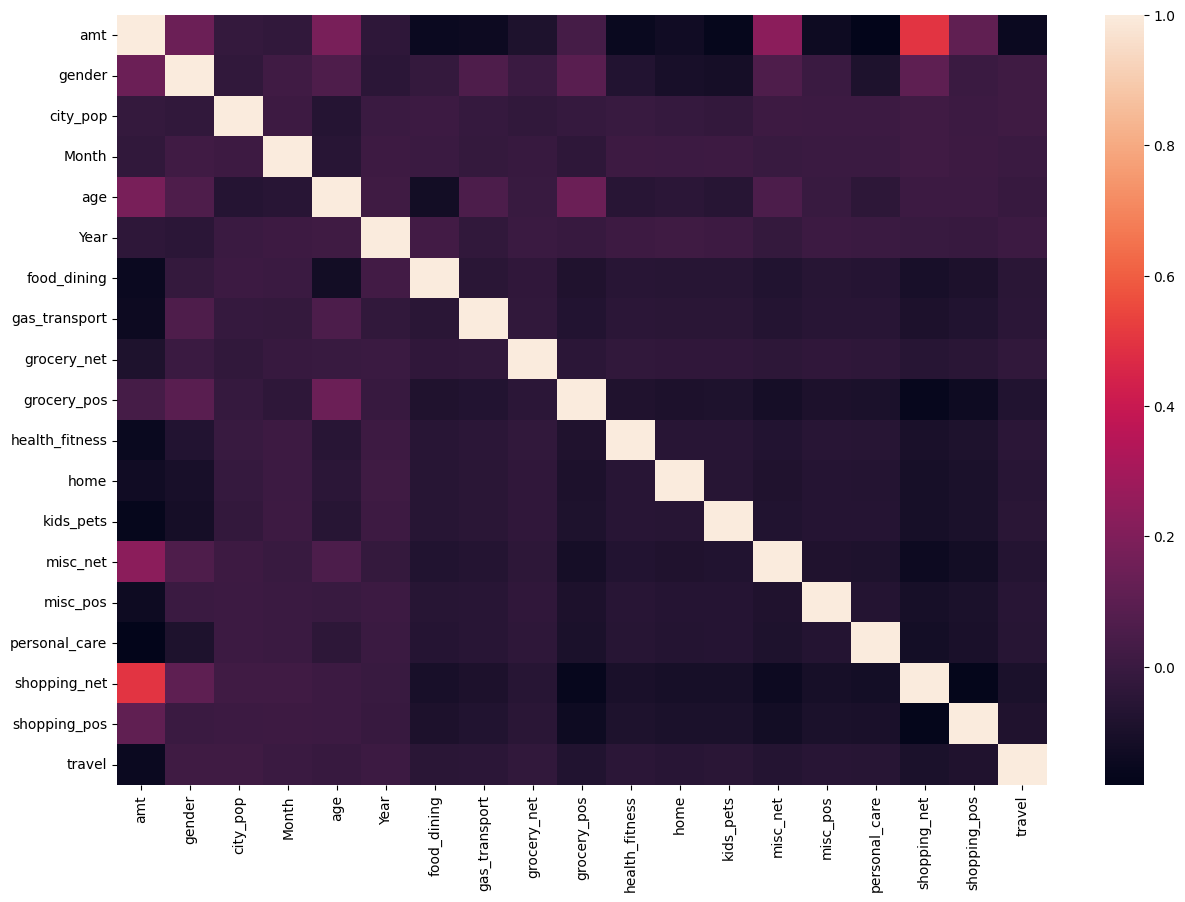

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr())

## Creating Model

We are starting with linear model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred_train = logreg.predict(x_train_scaled)

In [ ]:
y_pred_test = logreg.predict(x_test_scaled)

In [ ]:
print("overall model score for train data without any tuning in the model is {}".format(logreg.score(x_train_scaled,y_train)))
print("-----------------------------------------------------------------------------------------")
print("overall model score for test data without any tuning in the model is {}".format(logreg.score(x_test_scaled,y_test)))
print("-----------------------------------------------------------------------------------------")

overall model score for train data without any tuning in the model is 0.9358056034091939
-----------------------------------------------------------------------------------------
overall model score for test data without any tuning in the model is 0.9327934243926025
-----------------------------------------------------------------------------------------


In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)           
rfe = rfe.fit(x_train, y_train)

In [ ]:
list(zip(x_train_scaled.columns,rfe.support_,rfe.ranking_))

[('amt', False, 9),
 ('gender', False, 4),
 ('city_pop', False, 11),
 ('Month', False, 8),
 ('age', False, 10),
 ('Year', False, 3),
 ('food_dining', True, 1),
 ('gas_transport', True, 1),
 ('grocery_net', True, 1),
 ('grocery_pos', True, 1),
 ('health_fitness', True, 1),
 ('home', False, 5),
 ('kids_pets', False, 7),
 ('misc_net', True, 1),
 ('misc_pos', False, 6),
 ('personal_care', False, 2),
 ('shopping_net', True, 1),
 ('shopping_pos', True, 1),
 ('travel', True, 1)]

In [ ]:
new_cols =x_train_scaled.columns[~rfe.support_]

In [ ]:
x_train_1  = x_train_scaled[new_cols]
x_test_1 = x_test_scaled[new_cols]

In [ ]:
x_train_1.head()

,amt,gender,city_pop,Month,age,Year,home,kids_pets,misc_pos,personal_care
0,-0.700951,1.159999,-0.285096,-0.776509,0.085307,-0.966382,-0.249434,-0.245928,3.976493,-0.268376
1,-0.666413,-0.862070,-0.293767,-0.471812,-0.647007,-0.966382,-0.249434,-0.245928,-0.251478,-0.268376
2,0.155265,-0.862070,-0.294433,0.137582,0.254303,-0.966382,-0.249434,-0.245928,-0.251478,-0.268376
3,-0.699323,1.159999,-0.271255,0.137582,0.648626,-0.966382,-0.249434,-0.245928,-0.251478,-0.268376
4,2.387784,1.159999,-0.292617,1.661068,-1.210326,1.034787,-0.249434,-0.245928,-0.251478,-0.268376


In [ ]:
logreg2 = LogisticRegression()

In [ ]:
logreg2.fit(x_train_1,y_train)

LogisticRegression()

In [ ]:
print("overall model score for train data without any tuning in the model is {}".format(logreg2.score(x_train_1,y_train)))
print("-----------------------------------------------------------------------------------------")
print("overall model score for test data without any tuning in the model is {}".format(logreg2.score(x_test_1,y_test)))
print("-----------------------------------------------------------------------------------------")

overall model score for train data without any tuning in the model is 0.890651917671593
-----------------------------------------------------------------------------------------
overall model score for test data without any tuning in the model is 0.8892783754381723
-----------------------------------------------------------------------------------------


In [ ]:
y_train.value_counts()

1    5541
0    5488
Name: is_fraud, dtype: int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = [variance_inflation_factor(x_train_1.values, i) for i in range(len(x_train_1.columns))]

In [ ]:
vif_data = pd.DataFrame({"cols":x_train_1.columns,"VIF":vif})

In [ ]:
vif_data

,cols,VIF
0,amt,1.176496
1,gender,1.052546
2,city_pop,1.006393
3,Month,1.004165
4,age,1.044991
5,Year,1.003749
6,home,1.059643
7,kids_pets,1.075894
8,misc_pos,1.049920
9,personal_care,1.077549


Lets check wether all different sets of validations give such good results or not.

In [ ]:
y_pred_train = logreg2.predict(x_train_1)

In [ ]:
y_pred_test = logreg2.predict(x_test_1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5488
           1       0.99      0.79      0.88      5541

    accuracy                           0.89     11029
   macro avg       0.91      0.89      0.89     11029
weighted avg       0.91      0.89      0.89     11029



Classification report for test variables.

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4163
           1       0.98      0.79      0.88      4110

    accuracy                           0.89      8273
   macro avg       0.91      0.89      0.89      8273
weighted avg       0.90      0.89      0.89      8273



Lets create a statistical model and try to understand more about the data.

Now lets try ensamble model to check weter it improves the performance or not.

Creating Ensamble model 
## Random Forest.

In [ ]:
x_train_forest = x_train[x_train_1.columns]
x_test_forest = x_test[x_test_1.columns]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators= 10,random_state=0)
 
# fit the regressor with x and y data
regressor.fit(x_train_forest, y_train) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
Y_pred = regressor.predict(x_train_forest) 

In [ ]:
Result = pd.DataFrame({"Original_result":y_train,"Predicted":Y_pred})
Result["Predicted"] = Result["Predicted"].apply(lambda x: 1 if x>0.5 else 0)

In [ ]:
print(classification_report(y_train,Result.Predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5488
           1       1.00      0.98      0.99      5541

    accuracy                           0.99     11029
   macro avg       0.99      0.99      0.99     11029
weighted avg       0.99      0.99      0.99     11029



In [ ]:
conf_mat = confusion_matrix(y_train, Result.Predicted)
print(conf_mat)

[[5484    4]
 [  84 5457]]


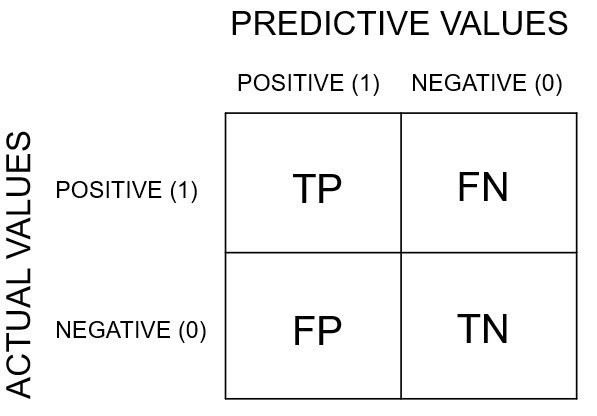

## Cost Benefit Analysis.

In [ ]:
df = x_train_df

In [ ]:
df["Month"] = pd.to_datetime(df.trans_date_trans_time).dt.month

In [ ]:
df["Year"] = pd.to_datetime(df.trans_date_trans_time).dt.year

In [ ]:
df.groupby(["Year","Month"])["amt"].mean()

Year  Month
2019  1        71.580200
      2        72.286974
      3        70.876195
      4        69.941899
      5        69.774766
      6        70.138472
      7        69.795680
      8        69.223419
      9        70.059367
      10       70.555679
      11       69.911711
      12       70.311776
2020  1        70.170961
      2        70.514198
      3        70.859521
      4        70.132898
      5        70.538407
      6        71.120314
Name: amt, dtype: float64

Average amount spent in every month is almost same.

## Section 1- questions.

### Q1. Average number of transactions per month?

In [ ]:
avg_month_trans = df.shape[0]/24
print("Average number of transactions per month are {}.".format(int(avg_month_trans)))

Average number of transactions per month are 54028.


### Q2. Average number of fraudulent transaction per month?

In [ ]:
condition = df.is_fraud==1
df_fraud = df[condition]
avg_fraud_trans = df_fraud.shape[0]/24
print("Average number of fraudulent transactions per month are {}.".format(int(avg_fraud_trans)))

Average number of fraudulent transactions per month are 312.


### Q3. Average amount per fraud transaction?

In [ ]:
total_fraud_count = df_fraud.shape[0]

In [ ]:
avg_amt_fraud_trans = df_fraud.amt.sum()/total_fraud_count
print("Average amount per fraud transaction is {}".format(int(avg_amt_fraud_trans)))

Average amount per fraud transaction is 531


## Section 2- Questions.

### Q1. Cost incurred per month before the model was deployed (b*c)?

Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month.

In [ ]:
incurred_cost_bm = avg_amt_fraud_trans*avg_fraud_trans
print("Cost incurred per month before the model was deployed {}".format(int(incurred_cost_bm)))

Cost incurred per month before the model was deployed 166170


### Q2. Average number of transactions per month detected as fraudulent by the model (TF)?

In [ ]:
TF = conf_mat[0][0]/24
print("Average number of transactions per month detected as fraudulent by the model (TF) {}.".format(TF))

Average number of transactions per month detected as fraudulent by the model (TF) 228.5.


### Q3. Cost of providing customer executive support per fraudulent transaction detected by the model?

Ans: - 1.5$ is the cost of porviding cutomer executive support per fraudulent transaction detected by the model.

### Q4. Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)?

In [ ]:
support_cost = 1.5*TF
print("Total cost of providing customer support per month for fraudulent transactions detected by the model {}".format(support_cost))

Total cost of providing customer support per month for fraudulent transactions detected by the model 342.75


### Q5. Average number of transactions per month that are fraudulent but not detected by the model (FN)?

In [ ]:
FN = conf_mat[0][1]/24
print("Average number of transactions per month that are fraudulent but not detected by the model (FN) {}".format(FN))

Average number of transactions per month that are fraudulent but not detected by the model (FN) 0.16666666666666666


### Q6. Cost incurred due to fraudulent transactions left undetected by the model (FN*c)?

In [ ]:
cost_fn = avg_amt_fraud_trans*FN
print("Cost incurred due to fraudulent transactions left undetected by the model (FN*c) {}".format(avg_amt_fraud_trans*FN))

Cost incurred due to fraudulent transactions left undetected by the model (FN*c) 88.5533486544098


### Q7. Cost incurred per month after the model is built and deployed?

In [ ]:
x_train_1.columns

Index(['amt', 'gender', 'city_pop', 'Month', 'age', 'Year', 'home',
       'kids_pets', 'misc_pos', 'personal_care'],
      dtype='object')

In [ ]:
 print("Cost incurred per month after the model is built and deployed {}".format(support_cost+cost_fn))

Cost incurred per month after the model is built and deployed 431.3033486544098
